In [ ]:
# to predict the final price of each home

# 79 explanatory variables

# Practice Skills
# Creative feature engineering 
# Advanced regression techniques like random forest and gradient boosting

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train = pd.read_csv('/content/House_train.csv')
df_test = pd.read_csv('/content/House_test.csv')

In [ ]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Description study

In [ ]:
# Column: - 'Alley': Type of alley access to property
#            NA 	No alley access
#       Here, in Alley column there is NA means Np Alley access, 
#       here NA doesn't means missing value, So, Alley column need to hadle carefuly 

# Column: 'BsmtQual': Evaluates the height of the basement
#       NA	No Basement

# Column: 'BsmtCond': Evaluates the general condition of the basement'
#       NA	No Basement

# Column: 'BsmtExposure': Refers to walkout or garden level walls'
#       NA	No Basement

# Column: 'BsmtFinType1': Rating of basement finished area'
#       NA	No Basement

# Column: 'BsmtFinType2': Rating of basement finished area (if multiple types)'
#       NA	No Basement

# Column: 'FireplaceQu': Fireplace quality
#       NA	No Fireplace

# Column: 'GarageType': Garage location
#       NA	No Garage

# Column: 'GarageFinish': Interior finish of the garage
#       NA	No Garage

# Column: 'GarageQual': Garage quality
#       NA	No Garage

# Column: 'GarageCond': Garage condition
#       NA	No Garage

# Column: 'PoolQC': Pool quality
#       NA	No Pool

# Column: 'Fence': Fence quality
#       NA	No Fence

# Column: 'MiscFeature': Miscellaneous feature not covered in other categories
#       NA	None

In [ ]:
# columns with NA, but it doesn't means missing value
# 'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'  

# Imputaion - Handelling missing values

In [ ]:
# columns with actual missing values

missing_val_train_Columns = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt'] 
missing_val_test_Columns = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt', 'Utilities', 'MSZoning', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'KitchenQual', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']

In [ ]:
# all missing columns

missing_val_train_Columns1 = list(df_train.isna().sum()[df_train.isna().sum()>0].index)

In [ ]:
missing_val_train_Columns1

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
missing_val_test_Columns1 = list(df_test.isna().sum()[df_test.isna().sum()>0].index)

In [ ]:
missing_val_test_Columns1

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [ ]:
# columns includes NA, but it doesn't means missing value

missing_val_train_Columns2 = [col for col in missing_val_train_Columns1 if not col in missing_val_train_Columns]
missing_val_train_Columns2


['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
missing_val_test_Columns2 = [col for col in missing_val_test_Columns1 if not col in missing_val_test_Columns]
missing_val_test_Columns2

['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
len(missing_val_train_Columns2), len(missing_val_test_Columns2)

(14, 14)

In [ ]:
missing_val_train_Columns

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt']

In [ ]:
missing_val_test_Columns

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'Electrical',
 'GarageYrBlt',
 'Utilities',
 'MSZoning',
 'Exterior1st',
 'Exterior2nd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'KitchenQual',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Functional',
 'GarageCars',
 'GarageArea',
 'SaleType']

In [ ]:
df_train[missing_val_train_Columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrType   1452 non-null   object 
 2   MasVnrArea   1452 non-null   float64
 3   Electrical   1459 non-null   object 
 4   GarageYrBlt  1379 non-null   float64
dtypes: float64(3), object(2)
memory usage: 57.2+ KB


In [ ]:
df_test[missing_val_test_Columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1232 non-null   float64
 1   MasVnrType    1443 non-null   object 
 2   MasVnrArea    1444 non-null   float64
 3   Electrical    1459 non-null   object 
 4   GarageYrBlt   1381 non-null   float64
 5   Utilities     1457 non-null   object 
 6   MSZoning      1455 non-null   object 
 7   Exterior1st   1458 non-null   object 
 8   Exterior2nd   1458 non-null   object 
 9   BsmtFinSF1    1458 non-null   float64
 10  BsmtFinSF2    1458 non-null   float64
 11  BsmtUnfSF     1458 non-null   float64
 12  KitchenQual   1458 non-null   object 
 13  TotalBsmtSF   1458 non-null   float64
 14  BsmtFullBath  1457 non-null   float64
 15  BsmtHalfBath  1457 non-null   float64
 16  Functional    1457 non-null   object 
 17  GarageCars    1458 non-null   float64
 18  GarageArea    1458 non-null 

In [ ]:
temp_obj_train = list(df_train[missing_val_train_Columns].select_dtypes(include='O'))
temp_obj_test = list(df_test[missing_val_test_Columns].select_dtypes(include='O'))

In [ ]:
temp_obj_train

['MasVnrType', 'Electrical']

In [ ]:
temp_obj_test

['MasVnrType',
 'Electrical',
 'Utilities',
 'MSZoning',
 'Exterior1st',
 'Exterior2nd',
 'KitchenQual',
 'Functional',
 'SaleType']

In [ ]:
temp_intflt_train = list(df_train[missing_val_train_Columns].select_dtypes(exclude='O'))
temp_intflt_test = list(df_test[missing_val_test_Columns].select_dtypes(exclude='O'))

In [ ]:
temp_intflt_train

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
temp_intflt_test

['LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea']

In [ ]:
for col in temp_obj_train:
  df_train[col].fillna(df_train[col].mode().iloc[0], inplace = True)
  df_test[col].fillna(df_train[col].mode().iloc[0], inplace = True)

for col in temp_obj_test:
  df_test[col].fillna(df_train[col].mode().iloc[0], inplace = True)

In [ ]:
for col in temp_intflt_train:
  df_train[col].fillna(df_train[col].median(), inplace = True)
  df_test[col].fillna(df_train[col].median(), inplace = True)

for col in temp_intflt_test:
  df_test[col].fillna(df_train[col].median(), inplace=True)

In [ ]:
# Checking of whether handelling of missing values are done or not in [missing_val_train_Columns] and [missing_val_test_Columns]

In [ ]:
sum(df_train[missing_val_train_Columns].isna().sum())

0

In [ ]:
df_test[missing_val_train_Columns].isna().sum()

LotFrontage    0
MasVnrType     0
MasVnrArea     0
Electrical     0
GarageYrBlt    0
dtype: int64

In [ ]:
df_test[missing_val_test_Columns].isna().sum()

LotFrontage     0
MasVnrType      0
MasVnrArea      0
Electrical      0
GarageYrBlt     0
Utilities       0
MSZoning        0
Exterior1st     0
Exterior2nd     0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
KitchenQual     0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
Functional      0
GarageCars      0
GarageArea      0
SaleType        0
dtype: int64

In [ ]:
sum(df_test.isna().sum()>0), sum(df_train.isna().sum()>0)

(14, 14)

# columns with NA as category, i.e. NA is not missing value
# replacing these NA by some string lets say 'ABCD'

In [ ]:
missing_val_train_Columns2

['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
missing_val_test_Columns2

['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
df_train[missing_val_train_Columns2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Alley         91 non-null     object
 1   BsmtQual      1423 non-null   object
 2   BsmtCond      1423 non-null   object
 3   BsmtExposure  1422 non-null   object
 4   BsmtFinType1  1423 non-null   object
 5   BsmtFinType2  1422 non-null   object
 6   FireplaceQu   770 non-null    object
 7   GarageType    1379 non-null   object
 8   GarageFinish  1379 non-null   object
 9   GarageQual    1379 non-null   object
 10  GarageCond    1379 non-null   object
 11  PoolQC        7 non-null      object
 12  Fence         281 non-null    object
 13  MiscFeature   54 non-null     object
dtypes: object(14)
memory usage: 159.8+ KB


In [ ]:
df_test[missing_val_test_Columns2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Alley         107 non-null    object
 1   BsmtQual      1415 non-null   object
 2   BsmtCond      1414 non-null   object
 3   BsmtExposure  1415 non-null   object
 4   BsmtFinType1  1417 non-null   object
 5   BsmtFinType2  1417 non-null   object
 6   FireplaceQu   729 non-null    object
 7   GarageType    1383 non-null   object
 8   GarageFinish  1381 non-null   object
 9   GarageQual    1381 non-null   object
 10  GarageCond    1381 non-null   object
 11  PoolQC        3 non-null      object
 12  Fence         290 non-null    object
 13  MiscFeature   51 non-null     object
dtypes: object(14)
memory usage: 159.7+ KB


In [ ]:
df_train['Alley'].dtype=='O'

True

In [ ]:
df_train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [ ]:
# following code not work
# df_train.replace('NA', 'ABCD', inplace=True)
# df_test.replace('NA', 'ABCD', inplace=True)

In [ ]:
df_train.replace(to_replace= np.nan, value = 'ABCD', inplace = True)
df_test.replace(to_replace= np.nan, value = 'ABCD', inplace = True)

In [ ]:
sum(df_train.isna().sum()), sum(df_test.isna().sum())

(0, 0)

In [ ]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [ ]:
# handelling missing value done

# Analysing SalePrice

In [ ]:
# Statistics summary

df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

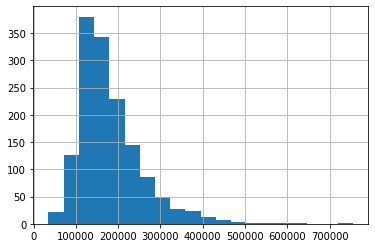

In [ ]:
df_train['SalePrice'].hist(bins=20)

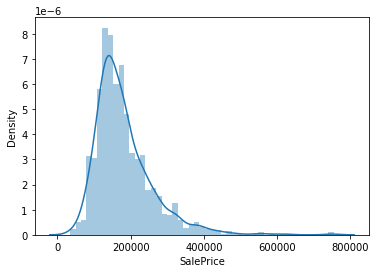

In [ ]:
sns.distplot(df_train['SalePrice'])

In [ ]:
# differentiate between numerical and categorical varibles

categorical_features = df_train.select_dtypes(include = 'O').columns
numerical_features = df_train.select_dtypes(exclude = 'O').columns

In [ ]:
# taking numerical dataset and categorical datasets separately

train_num = df_train[numerical_features]
train_cat = df_train[categorical_features]

In [ ]:
# differentiate between numerical and categorical varibles

categorical_features = df_test.select_dtypes(include = 'O').columns
numerical_features = df_test.select_dtypes(exclude = 'O').columns

test_num = df_test[numerical_features]
test_cat = df_test[categorical_features]

In [ ]:
train_num.shape, test_num.shape

((1460, 38), (1459, 37))

In [ ]:
# do concat of train_num in df_train_R1 and test_num in df_test_R1

In [ ]:
train_cat.shape, test_cat.shape

((1460, 43), (1459, 43))

# Feature Encoding: Encoding of categorical columns

In [ ]:
df_train.select_dtypes(include = 'O').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
all_cat_columns = list(df_train.select_dtypes(include = 'O').columns)

In [ ]:
df_test.select_dtypes(include = 'O').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
len(all_cat_columns)

43

In [ ]:
# Encoding needed for columns:

# columns with Nominal data: No Relation: eg. blood groups - A+, B, AB, O
# one_hot_enc_columns = ['MSZoning', "Street", 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MiscFeature', 'SaleCondition', 'Foundation', 'Heating']

# Columns with ordinal data: Relation: levels- high, mediam, low
# label_enc_columns = ['LotShape', 'Utilities', 'LandSlope', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'SaleType']; different labels

# label_enc_columns1 = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'HeatingQC', 'KitchenQual']; same labels: {'Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'}
                      

In [ ]:
one_hot_enc_columns = ['MSZoning', "Street", 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MiscFeature', 'SaleCondition', 'Foundation', 'Heating']

In [ ]:
# Trial of one_hot_encoding

In [ ]:
df_train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [ ]:
df_test['MSZoning'].value_counts()

RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [ ]:
temp = pd.DataFrame()
temp1 = pd.get_dummies(df_train['MSZoning'], prefix='MSZoning', drop_first=True)
pd.concat([temp, temp1], axis=1)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
1455,0,0,1,0
1456,0,0,1,0
1457,0,0,1,0
1458,0,0,1,0


In [ ]:
one_hot_enc_train = pd.DataFrame()

for col in one_hot_enc_columns:
  temp1 = pd.get_dummies(df_train[col], prefix=col, drop_first=True)
  one_hot_enc_train = pd.concat([one_hot_enc_train, temp1], axis=1)
print(one_hot_enc_train)

      MSZoning_FV  MSZoning_RH  ...  Heating_OthW  Heating_Wall
0               0            0  ...             0             0
1               0            0  ...             0             0
2               0            0  ...             0             0
3               0            0  ...             0             0
4               0            0  ...             0             0
...           ...          ...  ...           ...           ...
1455            0            0  ...             0             0
1456            0            0  ...             0             0
1457            0            0  ...             0             0
1458            0            0  ...             0             0
1459            0            0  ...             0             0

[1460 rows x 127 columns]


In [ ]:
one_hot_enc_test = pd.DataFrame()

for col in one_hot_enc_columns:
  temp1 = pd.get_dummies(df_test[col], prefix=col, drop_first=True)
  one_hot_enc_test = pd.concat([one_hot_enc_test, temp1], axis=1)
print(one_hot_enc_test)

      MSZoning_FV  MSZoning_RH  ...  Heating_Grav  Heating_Wall
0               0            1  ...             0             0
1               0            0  ...             0             0
2               0            0  ...             0             0
3               0            0  ...             0             0
4               0            0  ...             0             0
...           ...          ...  ...           ...           ...
1454            0            0  ...             0             0
1455            0            0  ...             0             0
1456            0            0  ...             0             0
1457            0            0  ...             0             0
1458            0            0  ...             0             0

[1459 rows x 113 columns]


In [ ]:
df_train_R1 = pd.concat([train_num, one_hot_enc_train], axis=1)
df_test_R1 = pd.concat([test_num, one_hot_enc_test], axis=1)

In [ ]:
df_train_R1.shape, df_test_R1.shape, 

((1460, 165), (1459, 150))

In [ ]:
# Columns with ordinal data: Relation: eg. levels- high, mediam, low

# 1. different labels
label_enc_columns = ['LotShape', 'Utilities', 'LandSlope', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'SaleType']

# 2.same labels: {'Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'}
label_enc_columns1 = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'HeatingQC', 'KitchenQual']

In [ ]:
# sample label encoding 

In [ ]:
df_train['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [ ]:
df_test['CentralAir'].value_counts()

Y    1358
N     101
Name: CentralAir, dtype: int64

In [ ]:
# Label Encoding by applying lambda function

df_train_R1['LotShape_encod'] = df_train['LotShape'].apply(lambda X:3 if X=='Reg' else 2 if X=='IR1' else 1 if X=='IR2' else 0)
df_test_R1['LotShape_encod'] = df_test['LotShape'].apply(lambda X:3 if X=='Reg' else 2 if X=='IR1' else 1 if X=='IR2' else 0)

df_train_R1['Utilities_encod'] = df_train['Utilities'].apply(lambda X:3 if X=='AllPub' else 2 if X=='NoSewr' else 1 if X=='NoSeWa' else 0)
df_test_R1['Utilities_encod'] = df_test['Utilities'].apply(lambda X:3 if X=='AllPub' else 2 if X=='NoSewr' else 1 if X=='NoSeWa' else 0)

df_train_R1['LandSlope_encod'] = df_train['LandSlope'].apply(lambda X:2 if X=='Gtl' else 1 if X=='Mod' else 0)
df_test_R1['LandSlope_encod'] = df_test['LandSlope'].apply(lambda X:2 if X=='Gtl' else 1 if X=='Mod' else 0)

df_train_R1['BsmtExposure_encod'] = df_train['BsmtExposure'].apply(lambda X:4 if X=='Gd' else 3 if X=='Av' else 2 if X=='Mn' else 1 if X=='No' else 0)
df_test_R1['BsmtExposure_encod'] = df_test['BsmtExposure'].apply(lambda X:4 if X=='Gd' else 3 if X=='Av' else 2 if X=='Mn' else 1 if X=='No' else 0)

df_train_R1['BsmtFinType1_encod'] = df_train['BsmtFinType1'].apply(lambda X:4 if X=='GLQ' else 3 if X=='ALQ' else 2 if X=='BLQ' else 1 if X=='Rec' else 0)
df_test_R1['BsmtFinType1_encod'] = df_test['BsmtFinType1'].apply(lambda X:4 if X=='GLQ' else 3 if X=='ALQ' else 2 if X=='BLQ' else 1 if X=='Rec' else 0)

df_train_R1['BsmtFinType2_encod'] = df_train['BsmtFinType2'].apply(lambda X:4 if X=='GLQ' else 3 if X=='ALQ' else 2 if X=='BLQ' else 1 if X=='Rec' else 0)
df_test_R1['BsmtFinType2_encod'] = df_test['BsmtFinType2'].apply(lambda X:4 if X=='GLQ' else 3 if X=='ALQ' else 2 if X=='BLQ' else 1 if X=='Rec' else 0)

df_train_R1['CentralAir_encod'] = df_train['CentralAir'].apply(lambda X:1 if X=='Y' else 0)
df_test_R1['CentralAir_encod'] = df_test['CentralAir'].apply(lambda X:1 if X=='Y' else 0)

df_train_R1['Electrical_encod'] = df_train['Electrical'].apply(lambda X:4 if X=='SBrkr' else 3 if X=='FuseA' else 2 if X=='FuseF' else 1 if X=='FuseP' else 0)
df_test_R1['Electrical_encod'] = df_test['Electrical'].apply(lambda X:4 if X=='SBrkr' else 3 if X=='FuseA' else 2 if X=='FuseF' else 1 if X=='FuseP' else 0)

df_train_R1['Functional_encod'] = df_train['Functional'].apply(lambda X:5 if X=='Typ' else 4 if X=='Min1' else 3 if X=='Min2' else 2 if X=='Mod' else 1 if X=='Maj1' else 0)
df_test_R1['Functional_encod'] = df_test['Functional'].apply(lambda X:5 if X=='Typ' else 4 if X=='Min1' else 3 if X=='Min2' else 2 if X=='Mod' else 1 if X=='Maj1' else 0)

df_train_R1['GarageType_encod'] = df_train['GarageType'].apply(lambda X:5 if X=='2Types' else 4 if X=='Attchd' else 3 if X=='Basment' else 2 if X=='BuiltIn' else 1 if X=='CarPort' else 0)
df_test_R1['GarageType_encod'] = df_test['GarageType'].apply(lambda X:5 if X=='2Types' else 4 if X=='Attchd' else 3 if X=='Basment' else 2 if X=='BuiltIn' else 1 if X=='CarPort' else 0)

df_train_R1['GarageFinish_encod'] = df_train['GarageFinish'].apply(lambda X:3 if X=='RFn' else 2 if X=='RFn' else 1 if X=='Unf' else 0)
df_test_R1['GarageFinish_encod'] = df_test['GarageFinish'].apply(lambda X:3 if X=='RFn' else 2 if X=='RFn' else 1 if X=='Unf' else 0)

df_train_R1['PavedDrive_encod'] = df_train['PavedDrive'].apply(lambda X:2 if X=='Y' else 1 if X=='P' else 0)
df_test_R1['PavedDrive_encod'] = df_test['PavedDrive'].apply(lambda X:2 if X=='Y' else 1 if X=='P' else 0)

df_train_R1['Fence_encod'] = df_train['Fence'].apply(lambda X:4 if X=='GdPrv' else 3 if X=='MnPrv' else 2 if X=='GdWo' else 1 if X=='MnWw' else 0)
df_test_R1['Fence_encod'] = df_test['Fence'].apply(lambda X:4 if X=='GdPrv' else 3 if X=='MnPrv' else 2 if X=='GdWo' else 1 if X=='MnWw' else 0)

df_train_R1['SaleType_encod'] = df_train['SaleType'].apply(lambda X:4 if X=='WD' else 3 if X=='CWD' else 2 if X=='VWD' else 1 if X=='New' else 0)
df_test_R1['SaleType_encod'] = df_test['SaleType'].apply(lambda X:4 if X=='WD' else 3 if X=='CWD' else 2 if X=='VWD' else 1 if X=='New' else 0)

In [ ]:
# Labelencoding of label_enc_columns1 by using map function:

label_enc_columns1 = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'HeatingQC', 'KitchenQual']
dict1 = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'ABCD':0}

In [ ]:
for col in label_enc_columns1:
  df_train_R1[col] = df_train[col].map(dict1)
  df_test_R1[col] = df_test[col].map(dict1)

In [ ]:
df_test_R1['ExterQual'].value_counts()

3    892
4    491
5     55
2     21
Name: ExterQual, dtype: int64

In [ ]:
len(list(df_train_R1.columns))

189

In [ ]:
len(list(df_test_R1.columns))

174

In [ ]:
len(list(df_train_R1.select_dtypes(include = 'O').columns)), len(list(df_test_R1.select_dtypes(include = 'O').columns))

(0, 0)

# Feature Encoding Done

# Feature Selection

In [ ]:
X_columns = list(df_train_R1.columns)

In [ ]:
X_columns.remove('SalePrice')
X_columns.remove('Id')

In [ ]:
len(X_columns)

187

In [ ]:
df_train_R1.corr()['SalePrice']

Id            -0.021917
MSSubClass    -0.084284
LotFrontage    0.334771
LotArea        0.263843
OverallQual    0.790982
                 ...   
GarageQual     0.273839
GarageCond     0.263191
PoolQC         0.111696
HeatingQC      0.427649
KitchenQual    0.659600
Name: SalePrice, Length: 189, dtype: float64

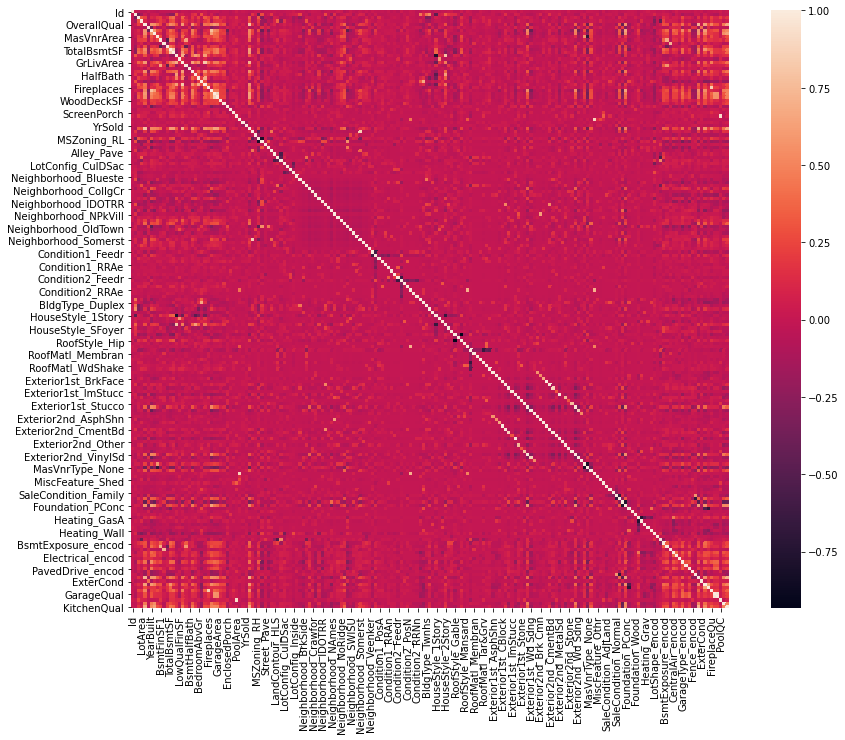

In [ ]:
corrmat = df_train_R1.corr()
f, ax = plt.subplots(figsize=(15,11))
sns.heatmap(corrmat, vmax=1, square=True)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'MSZoning_RL',
       'MSZoning_RM', 'Alley_Grvl', 'LandContour_HLS', 'LotConfig_CulDSac',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Condition1_Feedr', 'Condition1_Norm',
       'BldgType_Duplex', 'HouseStyle_2Story', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'RoofMatl_CompS

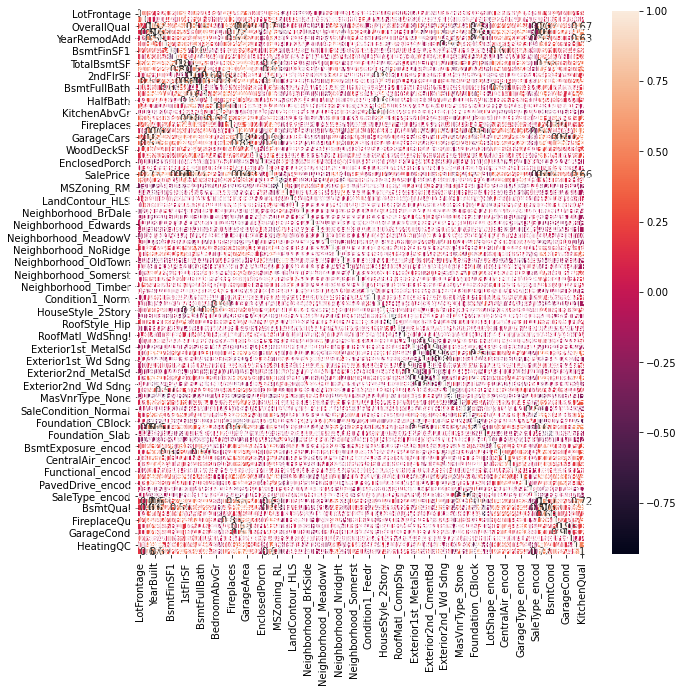

In [ ]:
top_corr_columns = corrmat.index[abs(corrmat['SalePrice'])>0.1]
plt.figure(figsize=(10,10))
sns.heatmap(df_train_R1[top_corr_columns].corr(), annot=True)
top_corr_columns

In [ ]:
top_corr_columns = list(top_corr_columns)

In [ ]:
test_columns = list(df_test_R1.columns)

In [ ]:
X_columns = [col for col in top_corr_columns if col in test_columns]
len(X_columns)

86

In [ ]:
y_column = ['SalePrice']

# importing model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dict1 = {'criterion':["mse", "mae"],
         'n_estimators':[20, 40, 60, 80, 100],
         'max_depth':[2,3,4,5,6],
         'min_samples_split':[3,4,5,6,7],
         'min_samples_leaf':[2,3,4,5,6],
        }

In [ ]:
# RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rand_cv = RandomizedSearchCV(RandomForestRegressor(), dict1, cv=5, n_jobs=-1, verbose=3)

In [ ]:
rand_cv.fit(df_train_R1[X_columns], df_train_R1[y_column])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rand_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model_1 = RandomForestRegressor(criterion='mse', max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=100, random_state=66)

In [ ]:
model_1.fit(df_train_R1[X_columns], df_train_R1[y_column])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=66, verbose=0, warm_start=False)

In [ ]:
y_pred = model_1.predict(df_test_R1[X_columns])
y_pred

array([126427.075, 149340.625, 170876.875, ..., 150771.25 , 119755.4  ,
       238308.1  ])

In [ ]:
df_test['SalePrice'] = y_pred

In [ ]:
df_test[['Id', 'SalePrice']].to_csv('house_price_submission_RF_RandSearchCV.csv', index = False)
from google.colab import files
files.download("house_price_submission_RF_RandSearchCV.csv")

In [ ]:
# to find model error 
# MSE-mean squared error by math.sqrt function

y_train = df_train['SalePrice']
y_train_pred = model_1.predict(df_train_R1[X_columns])

math.sqrt(sum((y_train-y_train_pred)**2)/len(y_train))

22754.326911944274

In [ ]:
# MSE-mean squared error by math.sqrt function

import sklearn

y_train = df_train['SalePrice']
y_train_pred = model_1.predict(df_train_R1[X_columns])

sklearn.metrics.mean_squared_error(y_train, y_train_pred)

517759393.21563226

In [ ]:
# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(RandomForestRegressor(), dict1, cv=3, n_jobs=-1, verbose=2)

In [ ]:
grid_cv.fit(df_train_R1[X_columns], df_train_R1[y_column])

Fitting 3 folds for each of 1250 candidates, totalling 3750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1028 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1393 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1838 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 2365 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 2972 tasks      | elapsed: 64.2min
[Parallel(n_jobs=-1)]: Done 3661 tasks      | elapsed: 111.9min
[Parallel(n_jobs=-1)]: Done 3750 out of 3750 | elapsed: 118.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model_2 = RandomForestRegressor(criterion='mse', max_depth=6, min_samples_leaf=2, min_samples_split=7, n_estimators=80, random_state=66)

In [ ]:
model_2.fit(df_train_R1[X_columns], df_train_R1['SalePrice'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=66, verbose=0, warm_start=False)

In [ ]:
# model error 
# MSE-mean squared error by math.sqrt function

y_train = df_train_R1['SalePrice']
y_train_pred = model_2.predict(df_train_R1[X_columns])

math.sqrt(sum((y_train-y_train_pred)**2)/len(y_train))

21427.70549364444

In [ ]:
# MSE-mean squared error by math.sqrt function

import sklearn

y_train = df_train_R1['SalePrice']
y_train_pred = model_2.predict(df_train_R1[X_columns])

sklearn.metrics.mean_squared_error(y_train, y_train_pred)

459146562.7223598

In [ ]:
# predict y for test data

In [ ]:
y_pred = model_2.predict(df_test_R1[X_columns])
y_pred

array([124902.20416445, 150326.23050603, 177738.65866605, ...,
       148467.79993592, 119072.19978235, 224767.64482202])

In [ ]:
df_test['SalePrice'] = y_pred

In [ ]:
df_test[['Id', 'SalePrice']].to_csv('house_price_submission_RF_GDSearchCV.csv', index = False)
from google.colab import files
files.download('house_price_submission_RF_GDSearchCV.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# R**2 (Coefficient of deterination) regression score function

sklearn.metrics.r2_score(y_train, y_train_pred)

0.9271980412045269